# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = 'https://api.openweathermap.org/data/2.5/weather?q='#{city name}&appid={API key}

city_weather = requests.get(f'{url}songyuan&appid={weather_api_key}&units=metric').json()
from pprint import pprint
pprint(city_weather)
# print(city_weather['coord'])

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 45.1171, 'lon': 124.8568},
 'dt': 1701513776,
 'id': 2035399,
 'main': {'feels_like': -21.81,
          'grnd_level': 1007,
          'humidity': 98,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': -16.28,
          'temp_max': -16.28,
          'temp_min': -16.28},
 'name': 'Songyuan',
 'sys': {'country': 'CN', 'sunrise': 1701471562, 'sunset': 1701504025},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 272, 'gust': 2.42, 'speed': 2.21}}


In [4]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | kununurra
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | puerto aysen
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | port douglas
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | port macquarie
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | st. john's
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | haiku-pauwela
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | burao
Processing Record 22 of Set 1 | blackmans bay
Processing 

Processing Record 39 of Set 4 | linares
Processing Record 40 of Set 4 | callaway
Processing Record 41 of Set 4 | musay'id
City not found. Skipping...
Processing Record 42 of Set 4 | edson
Processing Record 43 of Set 4 | amble
Processing Record 44 of Set 4 | gwadar
Processing Record 45 of Set 4 | turpan
Processing Record 46 of Set 4 | tateyama
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | nizhnesortymskiy
Processing Record 49 of Set 4 | fortaleza
Processing Record 0 of Set 5 | san antonio del estrecho
City not found. Skipping...
Processing Record 1 of Set 5 | gadzhiyevo
Processing Record 2 of Set 5 | kone
Processing Record 3 of Set 5 | ippy
Processing Record 4 of Set 5 | badger
Processing Record 5 of Set 5 | langepas
Processing Record 6 of Set 5 | changli
Processing Record 7 of Set 5 | masterton
Processing Record 8 of Set 5 | corner brook
Processing Record 9 of Set 5 | waddan
Processing Record 10 of Set 5 | rovnoye
Processing Record 11 of Set 5 | diego de almagr

Processing Record 31 of Set 8 | fale old settlement
Processing Record 32 of Set 8 | ballina
Processing Record 33 of Set 8 | yoloten
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | uliastay
Processing Record 37 of Set 8 | acopiara
Processing Record 38 of Set 8 | faya-largeau
Processing Record 39 of Set 8 | canutama
Processing Record 40 of Set 8 | ratnagiri
Processing Record 41 of Set 8 | susanville
Processing Record 42 of Set 8 | shijiazhuang
Processing Record 43 of Set 8 | flying fish cove
Processing Record 44 of Set 8 | celendin
Processing Record 45 of Set 8 | uaboe
City not found. Skipping...
Processing Record 46 of Set 8 | amalapuram
Processing Record 47 of Set 8 | spring creek
Processing Record 48 of Set 8 | novosergiyevka
Processing Record 49 of Set 8 | san salvador
Processing Record 0 of Set 9 | ouargla
Processing Record 1 of Set 9 | yuzhno-kurilsk
Processing Record 2 of Set 9 | domoni
Processing Record 3 of Se

Processing Record 21 of Set 12 | conde
Processing Record 22 of Set 12 | tanki leendert
City not found. Skipping...
Processing Record 23 of Set 12 | brisas de zicatela
Processing Record 24 of Set 12 | zabaykal'sk
Processing Record 25 of Set 12 | guantanamo
Processing Record 26 of Set 12 | nishinoomote
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | chongwe
Processing Record 29 of Set 12 | southport
Processing Record 30 of Set 12 | petawawa
Processing Record 31 of Set 12 | kalevala
Processing Record 32 of Set 12 | dingwall
Processing Record 33 of Set 12 | kirkwood
Processing Record 34 of Set 12 | tobelo
Processing Record 35 of Set 12 | puerto santa
Processing Record 36 of Set 12 | anahuac
Processing Record 37 of Set 12 | arno
Processing Record 38 of Set 12 | choibalsan
Processing Record 39 of Set 12 | aoulef
Processing Record 40 of Set 12 | jahangirpur
Processing Record 41 of Set 12 | falesti
-----------------------------
Data Retrieval Complete      
------

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,3.82,91,90,4.34,CL,1701513791
1,whitehorse,60.7161,-135.0538,-10.57,92,100,3.09,CA,1701513791
2,kununurra,-15.7667,128.7333,32.99,43,60,3.09,AU,1701513792
3,ushuaia,-54.8000,-68.3000,4.81,81,75,7.20,AR,1701513782
4,puerto aysen,-45.4000,-72.7000,4.67,99,94,2.38,CL,1701513793


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,3.82,91,90,4.34,CL,1701513791
1,whitehorse,60.7161,-135.0538,-10.57,92,100,3.09,CA,1701513791
2,kununurra,-15.7667,128.7333,32.99,43,60,3.09,AU,1701513792
3,ushuaia,-54.8000,-68.3000,4.81,81,75,7.20,AR,1701513782
4,puerto aysen,-45.4000,-72.7000,4.67,99,94,2.38,CL,1701513793


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

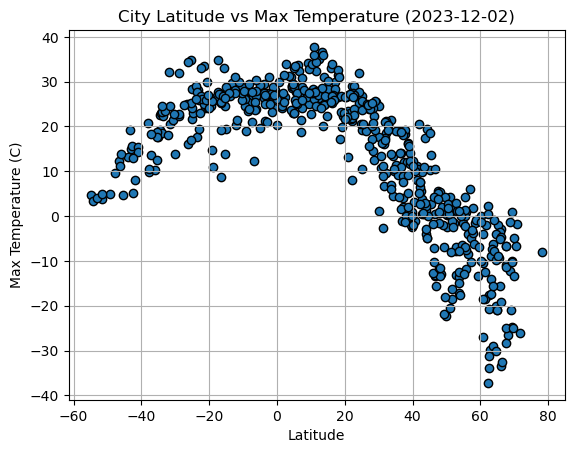

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023-12-02)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

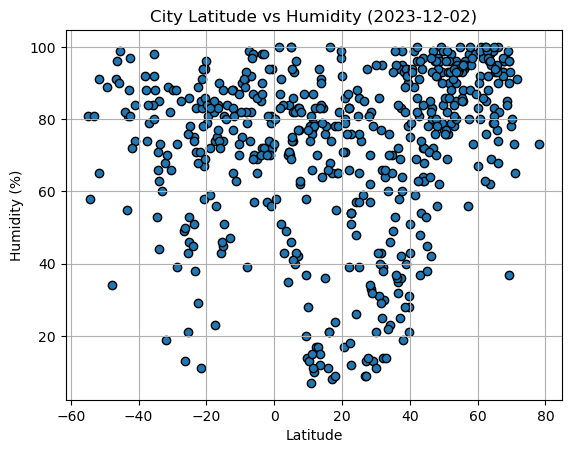

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-12-02)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

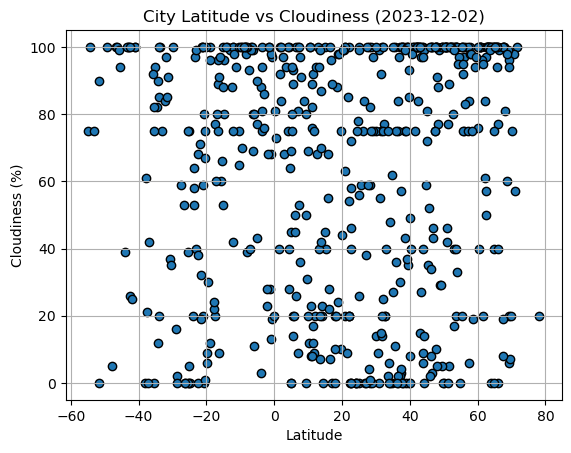

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-12-02)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

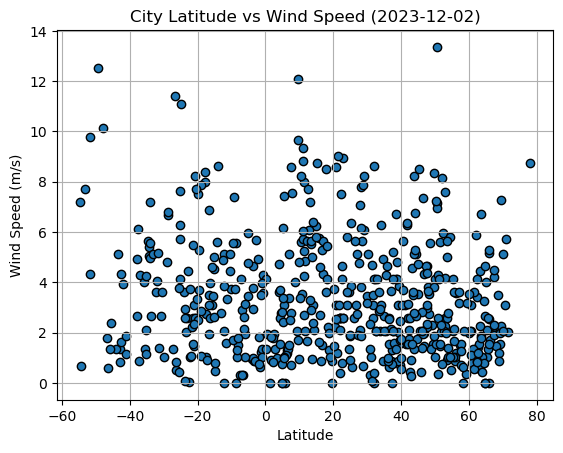

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-12-02)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x,y):
    slope, intercept, r_value,p_value,std_err = linregress(x,y)
    regress_line= slope * x + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_line,color='red') 
    plt.text(x.max()*0.9,y.max(),f'y={slope:.2f}x+{intercept:.2f}',color='red',fontsize=12)
    plt.xlabel('Latitude')
    print(f'The r-value is: {r_value}')
    plt.ylabel(f'{y.name}')
    plt.show()
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,-10.57,92,100,3.09,CA,1701513791
5,aykhal,66.0000,111.5000,-33.35,100,100,2.55,RU,1701513793
6,lompoc,34.6391,-120.4579,9.96,70,0,4.92,US,1701513794
7,aasiaat,68.7098,-52.8699,-12.22,85,60,3.48,GL,1701513794
10,olonkinbyen,70.9221,-8.7187,-1.67,65,57,5.71,SJ,1701513795


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,3.82,91,90,4.34,CL,1701513791
2,kununurra,-15.7667,128.7333,32.99,43,60,3.09,AU,1701513792
3,ushuaia,-54.8000,-68.3000,4.81,81,75,7.20,AR,1701513782
4,puerto aysen,-45.4000,-72.7000,4.67,99,94,2.38,CL,1701513793
8,namibe,-15.1961,12.1522,24.66,74,100,4.53,AO,1701513794


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8897000243423124


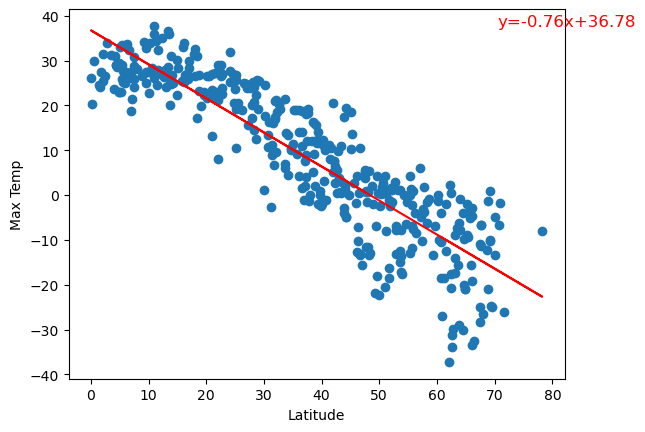

In [16]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Max Temp']

linear_regression_plots(x,y)

The r-value is: 0.6763623527058334


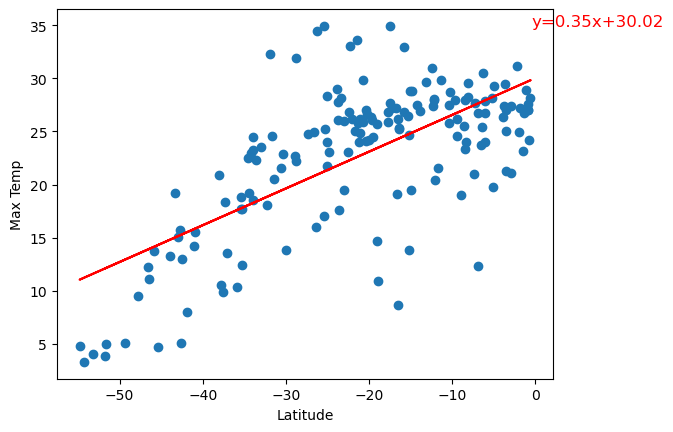

In [17]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']

linear_regression_plots(x,y)

**Discussion about the linear relationship:** We notice that there is a much stronger linear relationship as the r-value is close to -1. As the latitude increases, the temperature decreases quite significantly with a slope of 0.76. The southern hemisphere comparison shows us that there is a strong positive linear relationship. However, with the r-value of approximately 0.68, we can say that the relationship strength is a little more moderate that the northern hemisphere's but in an ascending manner. As the latitude increases closer to 0, the temperatures tend to increase moderately as well. With both of these graphs, we can say that as we get closer to the 0 latitude, we tend to have the highest temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39434948415000065


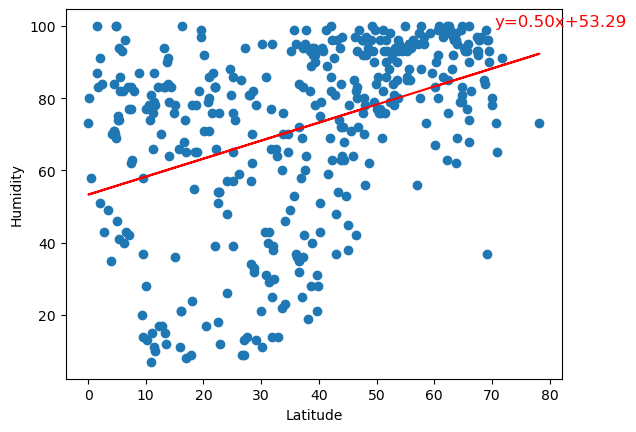

In [19]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']

linear_regression_plots(x,y)

The r-value is: 0.04755424613660932


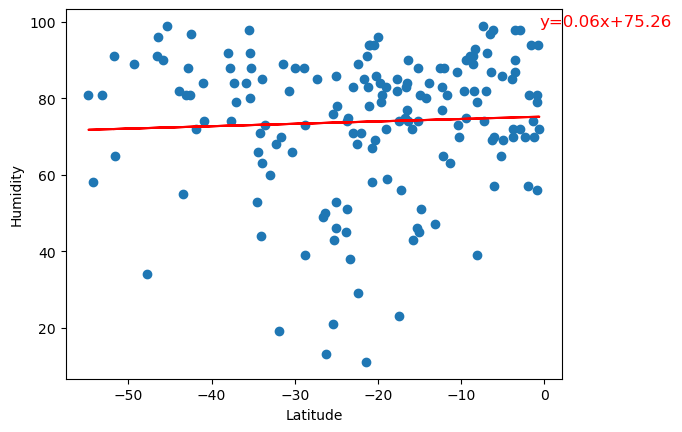

In [20]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']

linear_regression_plots(x,y)

**Discussion about the linear relationship:** The northern hemisphere tends to have a positive moderate relationship with the r-value of 0.394 rather than strong. As the latitude increases, the humidity also increases. The southern hemisphere has a very weak, or almost insignificant linear relationship between the latitude and humidity based on the data. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2040407179151774


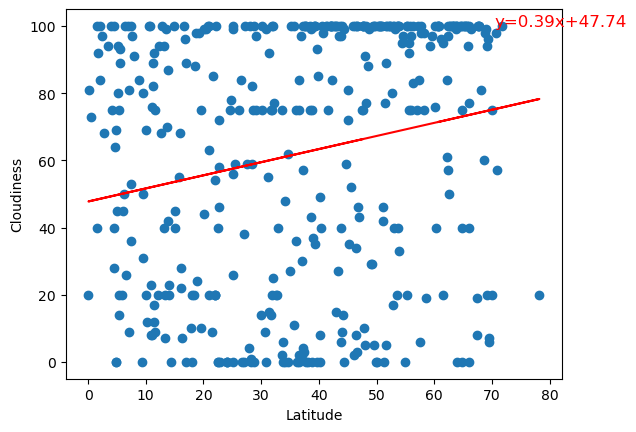

In [23]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']

linear_regression_plots(x,y)

The r-value is: 0.09635002477728558


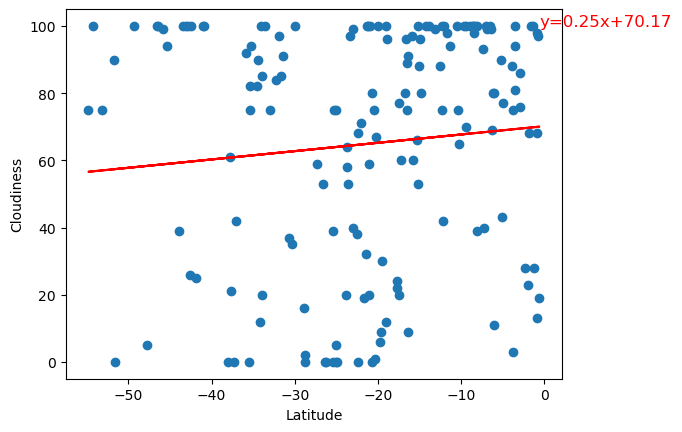

In [24]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']

linear_regression_plots(x,y)

**Discussion about the linear relationship:** In the northen hemisphere, we have an r value of approximately 0.204 which suggests a weak positive linear relationship. We can say that there might be a slight increase in the cloudiness as the latitude increases. However, the relationship between the two is not very strong. In the southern hemisphere, there is an r-value of 0.096 which suggests an even weaker positive linear relationship. There is almost no significant changes to the cloudiness as the latitude changes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.14488300387546493


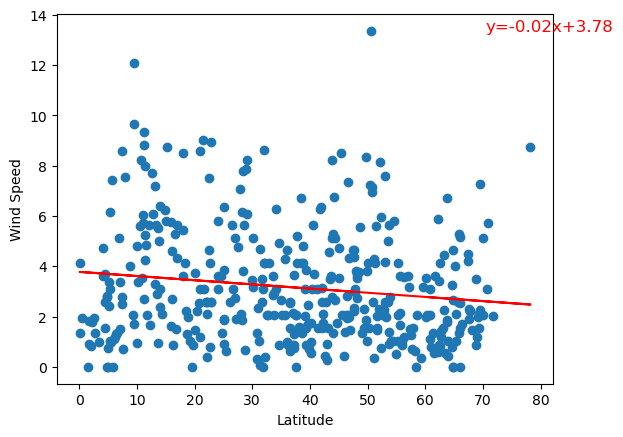

In [350]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']

linear_regression_plots(x,y)

The r-value is:-0.20752978637832584


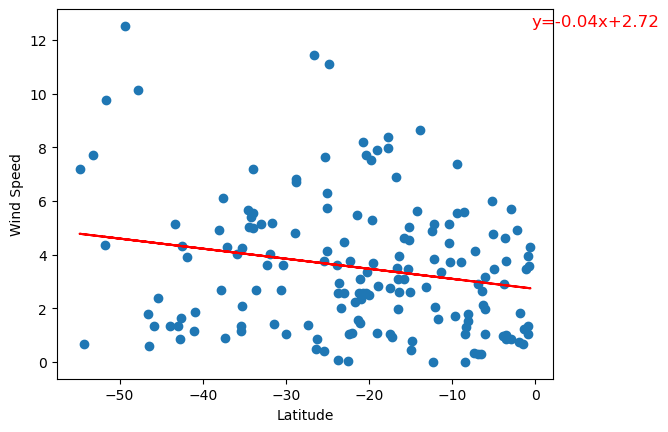

In [351]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']

linear_regression_plots(x,y)

**Discussion about the linear relationship:** In both hemispheres, we have rather weak negative linear relationships. In the northern hemisphere, we have an r-value of -0.145 which indicates there might be a small decrease in wind speed as the latitude increases. However, the relationship is not strong.

In the southern hemisphere, we have an r-value of -0.208 which is a stronger relationship that the northern hemisphere. However, the relationship is still weak.